In [11]:
import operator
import os
from functools import reduce
from itertools import groupby

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import auc, average_precision_score

In [12]:
sns.set(font_scale=1.2)
rcParams['figure.figsize'] = 12, 8
# rcParams['font.size'] = 15

In [13]:
CSV_RESULTS_FOLDER = 'csv_results'
os.listdir(CSV_RESULTS_FOLDER)

['Precision-Recall__L1_vs_p_pseudo__1_CNN_Layer.csv',
 'Precision-Recall__L1_vs_mRNA__2_CNN_Layers.csv',
 'ROC__L1_vs_p_pseudo__2_CNN_Layers.csv',
 'Precision-Recall__L1_vs_shuffled__1_CNN_Layer_Simple.csv',
 'ROC__p_pseudo_vs_shuffled__1_CNN_Layer.csv',
 'ROC__L1_vs_p_pseudo__1_CNN_Layer.csv',
 'ROC__L1_vs_shuffled__2_CNN_Layers.csv',
 'Precision-Recall__L1_mRNA_vs_shuffled__1_CNN_Layer_Simple.csv',
 'ROC__L1_vs_mRNA__3_CNN_Layers.csv',
 'Precision-Recall__p_pseudo_vs_shuffled__1_CNN_Layer_Simple.csv',
 'ROC__L1_vs_p_pseudo__1_CNN_Layer_Simple.csv',
 'Precision-Recall__mRNA_vs_shuffled__1_CNN_Layer_Simple.csv',
 'ROC__mRNA_vs_shuffled__2_CNN_Layers.csv',
 'Precision-Recall__p_pseudo_vs_shuffled__2_CNN_Layers.csv',
 'ROC__L1_vs_mRNA__1_CNN_Layer_Simple.csv',
 'ROC__p_pseudo_vs_shuffled__2_CNN_Layers.csv',
 'Precision-Recall__p_pseudo_vs_shuffled__1_CNN_Layer.csv',
 'Precision-Recall__p_pseudo_vs_shuffled__3_CNN_Layers.csv',
 '.ipynb_checkpoints',
 'ROC__L1_vs_shuffled__3_CNN_Layers.csv

In [14]:
EXPERIMENTS = set(
    map(
        lambda x: x.split('__')[1],
        filter(
            lambda y: not y.startswith('.'),
            os.listdir('csv_results/')
        )
    )
)
EXPERIMENTS

{'L1_mRNA_vs_shuffled',
 'L1_p_pseudo_vs_shuffled',
 'L1_vs_mRNA',
 'L1_vs_p_pseudo',
 'L1_vs_shuffled',
 'mRNA_vs_shuffled',
 'p_pseudo_vs_shuffled'}

In [15]:
MODELS = set(
    map(
        lambda x: x.split('__')[2][:-4],
        filter(
            lambda y: not y.startswith('.'),
            os.listdir('csv_results/')
        )
    )
)
MODELS

{'1_CNN_Layer', '1_CNN_Layer_Simple', '2_CNN_Layers', '3_CNN_Layers'}

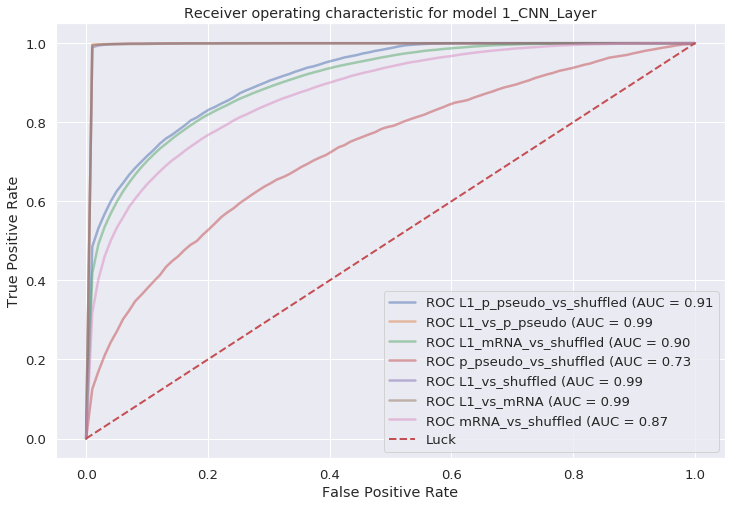

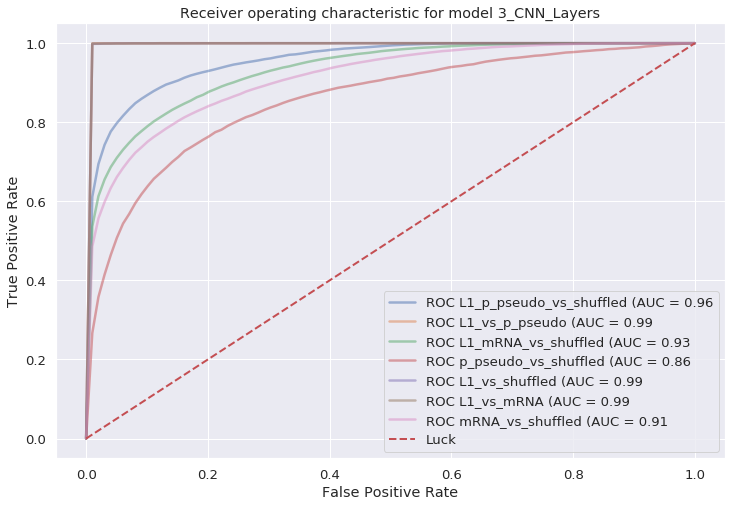

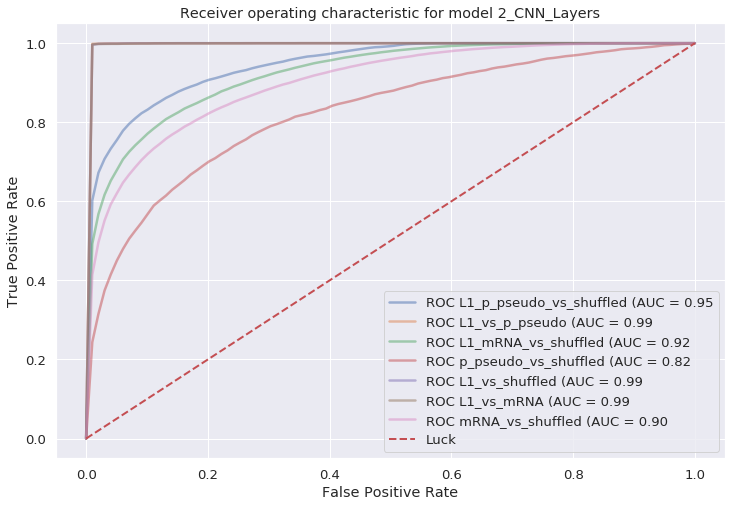

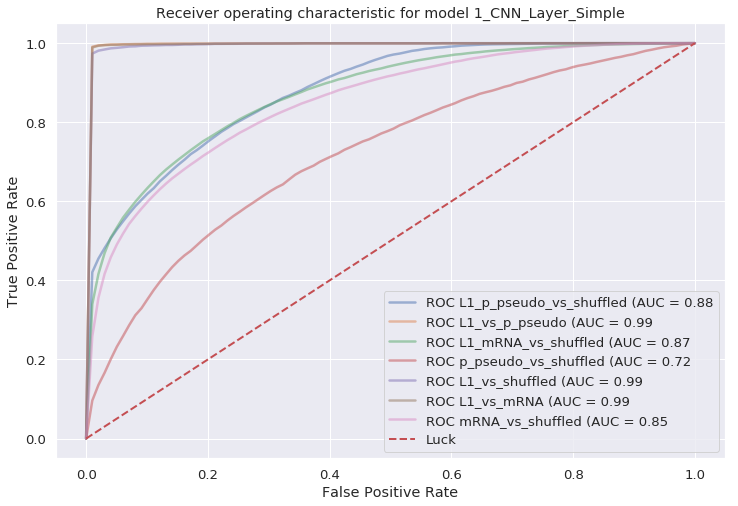

In [16]:
for model in MODELS:
    for exp_name in EXPERIMENTS:
        df = pd.read_csv(f'{CSV_RESULTS_FOLDER}/ROC__{exp_name}__{model}.csv')
        auc_score = auc(df.fpr, df.tpr)
        plt.plot(
            df.fpr,
            df.tpr,
            lw=2.5,
            alpha=0.5,
            label=f'ROC {exp_name} (AUC = {auc_score:0.2f}'
        )
    plt.plot(
        [0, 1],
        [0, 1],
        linestyle='--',
        lw=2,
        color='r',
        label='Luck',
        alpha=1.0
    )
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for model {model}')
    plt.legend(loc="lower right")
    plt.show()

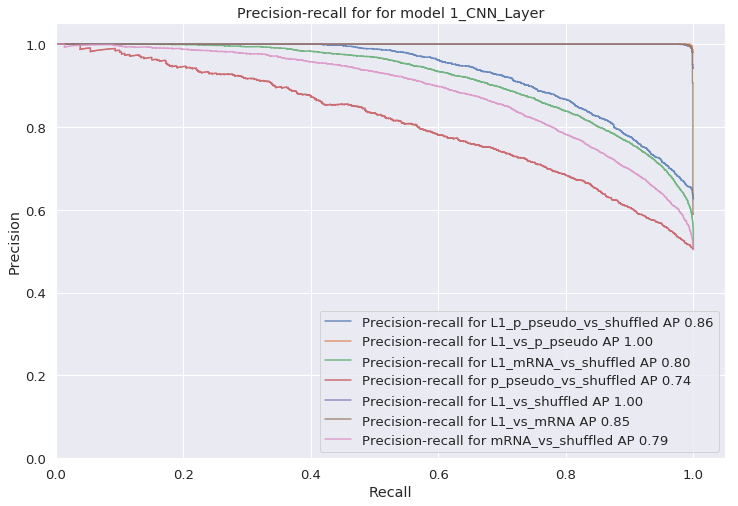

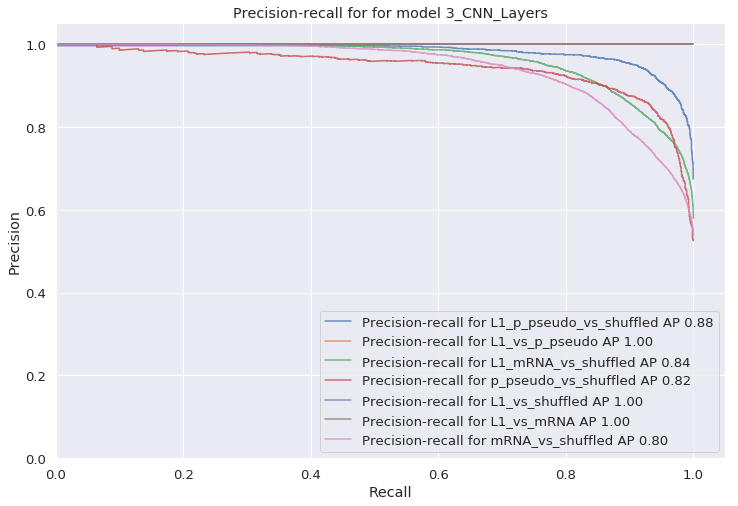

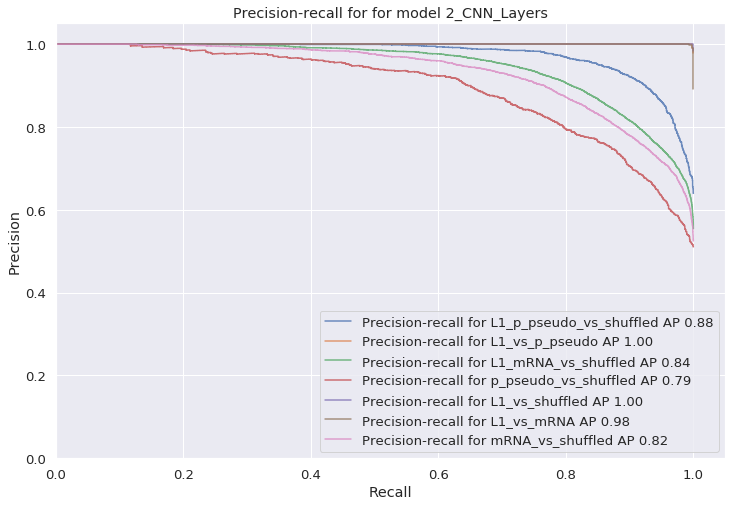

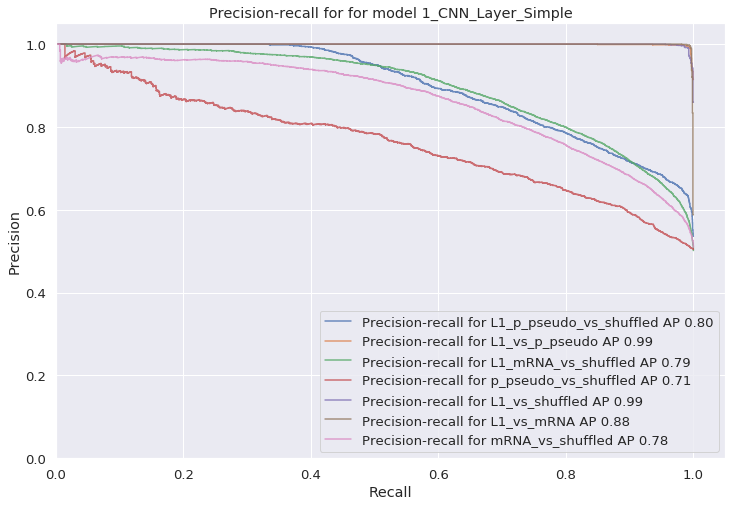

In [17]:
for model in MODELS:
    for exp_name in EXPERIMENTS:
        df = pd.read_csv(f'{CSV_RESULTS_FOLDER}/Precision-Recall__{exp_name}__{model}.csv')
        average_precision = sum(df.precision)/len(df.precision)
        plt.step(
            df.recall,
            df.precision,
            alpha=0.8,
            where='post',
            label=f'Precision-recall for {exp_name} AP {average_precision:0.2f}'
        )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title(f'Precision-recall for for model {model}')
    plt.legend(loc="lower right")
    plt.show()

# Extra recognition

In [18]:
extra_recognition_accuracy = pd.read_csv(
    'Extra_recognition.csv',
    sep=',',
)
extra_recognition_accuracy['% recognized'] = extra_recognition_accuracy['% recognized']*100
extra_recognition_accuracy.drop('Train classes', axis=1, inplace=True)
extra_recognition_accuracy.head()

,Model type,Recognition class,% recognized
0,3_CNN_Layers,mRNA,37.818305
1,3_CNN_Layers,p_pseudo,23.187243
2,3_CNN_Layers,RP,32.740214
3,2_CNN_Layers,mRNA,42.868682
4,2_CNN_Layers,p_pseudo,31.932605


Text(0, 0.5, '% recognized')

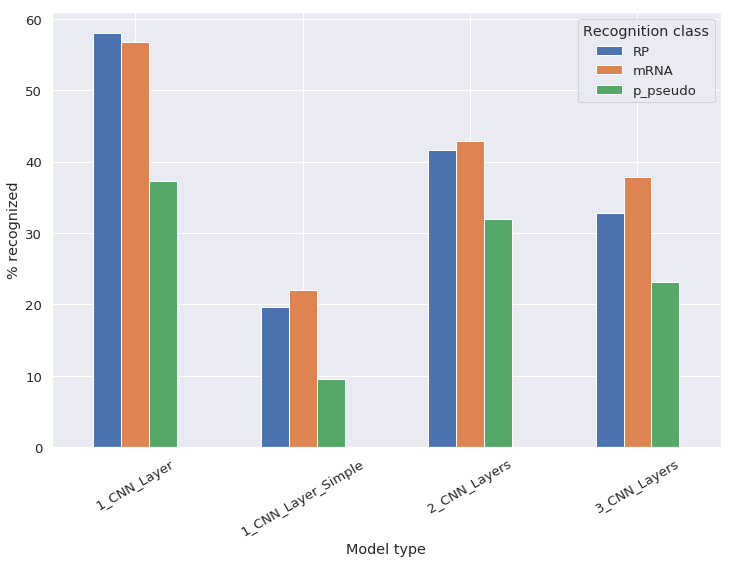

In [19]:
extra_recognition_accuracy.pivot(index='Model type', columns='Recognition class', values='% recognized').plot(kind='bar')
plt.xticks(rotation=30)
plt.ylabel('% recognized')

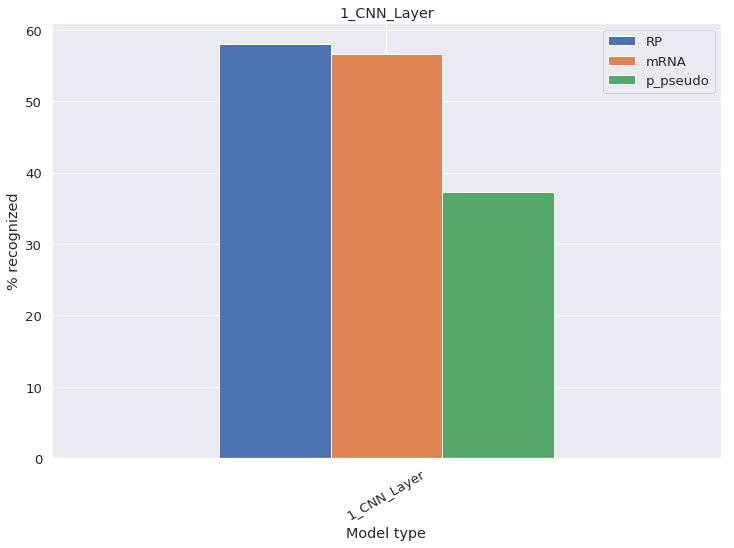

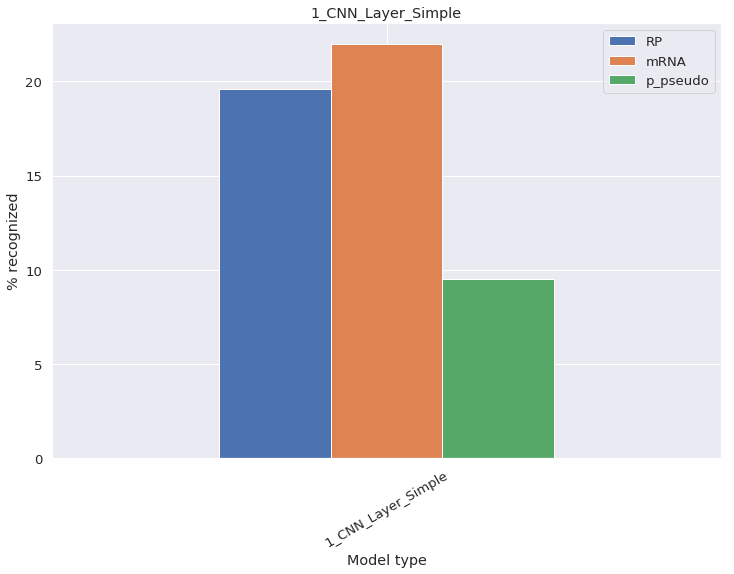

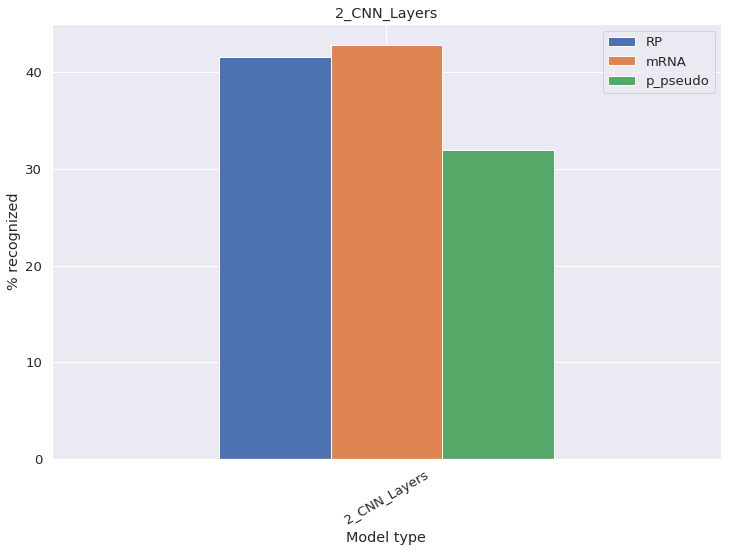

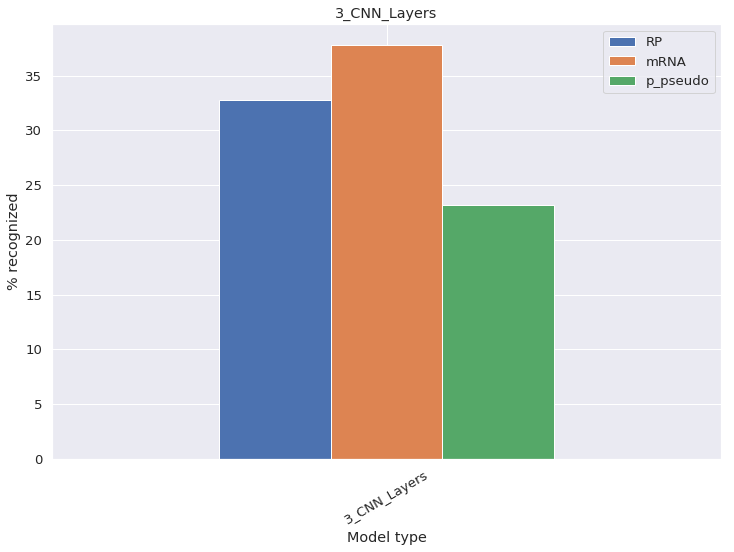

In [20]:
for group, df in extra_recognition_accuracy.groupby(['Model type']):
    df = df.pivot(index='Model type', columns='Recognition class', values='% recognized')
    df.plot(kind='bar')
    plt.xticks(rotation=30)
    plt.ylabel('% recognized')
    plt.title(group)
    plt.legend(loc=0)
plt.show()